# TMDB Box Office Movie's Revenue Prediction

![](https://cdn.onebauer.media/one/empire-tmdb/films/284054/images/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg?quality=50&width=1800&ratio=16-9&resizeStyle=aspectfill&format=jpg)

### My job to predict the international box office revenue for each movie in this given dataset

### Import all necesary libraries

In [17]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import OrderedDict

In [19]:
# Load dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [20]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [21]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [22]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [24]:
train.nunique()

id                       3000
belongs_to_collection     422
budget                    406
genres                    872
homepage                  941
imdb_id                  3000
original_language          36
original_title           2975
overview                 2992
popularity               2999
poster_path              2999
production_companies     2383
production_countries      321
release_date             2398
runtime                   139
spoken_languages          401
status                      2
tagline                  2400
title                    2969
Keywords                 2648
cast                     2975
crew                     2984
revenue                  2850
dtype: int64

### Exploratory Data Analysis

#### Data Analysis

In [25]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [26]:
train['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

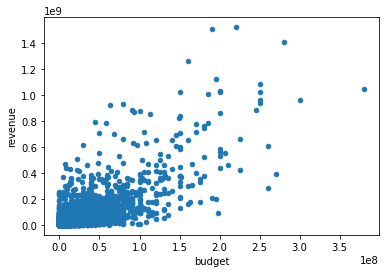

In [27]:
train.plot.scatter('budget','revenue')

In [28]:
# top ten movies with the costliest budgets.
budget = train.sort_values(by='budget', ascending=False)
print((budget.loc[:, "budget"]).head(10))

2135    380000000
2209    300000000
2770    280000000
1425    270000000
1270    260000000
1630    260000000
2532    250000000
961     250000000
906     250000000
666     250000000
Name: budget, dtype: int64


In [29]:
# Top ten movies with the highet revenue
revenue = train.sort_values(by='revenue', ascending=False)
print("Top ten movies with the highet revenue\n")
print((revenue.loc[:,"revenue"]).head(10))

Top ten movies with the highet revenue

1126    1519557910
1761    1506249360
2770    1405403694
684     1262886337
2322    1123746996
906     1084939099
2135    1045713802
2562    1028570889
881     1025491110
734     1023784195
Name: revenue, dtype: int64


In [30]:
#first removing features which are irrelevant for our prediction
train.drop(['imdb_id','poster_path'],axis=1,inplace=True)
test.drop(['imdb_id','poster_path'],axis=1,inplace=True)

#### Missing or Null Values in the given dataset

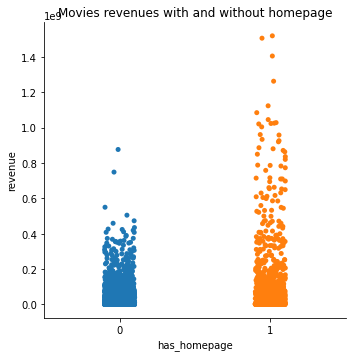

In [31]:
#we have a lot of null values for homepage
#Converting homepage as binary
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

#Homepage v/s Revenue
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Movies revenues with and without homepage');

In [32]:
train = train.drop(['homepage'],axis =1)
test = test.drop(['homepage'],axis =1)

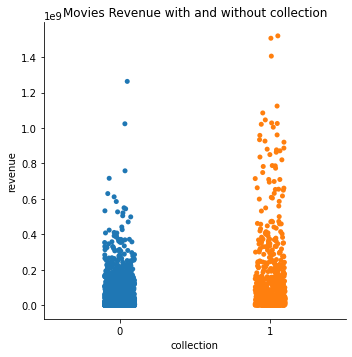

In [33]:
#Converting collections as binary
train['collection'] = 0
train.loc[train['belongs_to_collection'].isnull() == False, 'collection'] = 1
test['collection'] = 0
test.loc[test['belongs_to_collection'].isnull() == False, 'collection'] = 1

#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=train);
plt.title('Movies Revenue with and without collection');

In [34]:
#Collection too increaes the revenue
train=train.drop(['belongs_to_collection'],axis =1)
test=test.drop(['belongs_to_collection'],axis =1)

### Lanaguage

#### Find the Most Profitable Movie languages wise

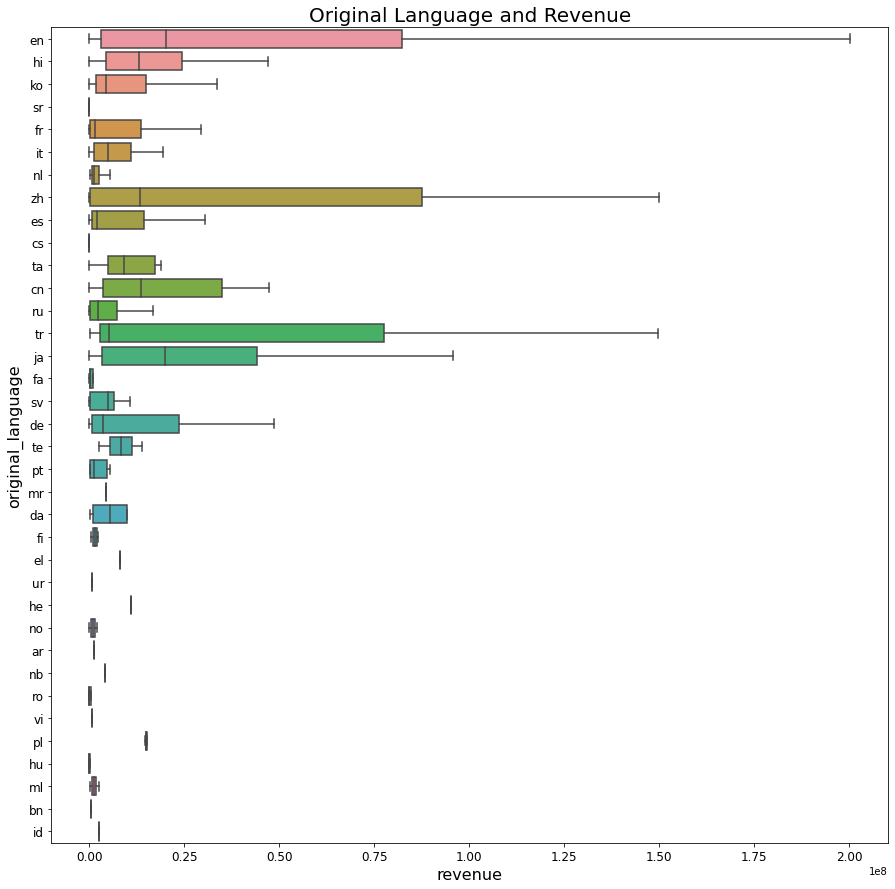

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Original Language and Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Original Language', fontsize=16)
sns.boxplot(ax=ax, x='revenue', y='original_language', data=train, showfliers=False, orient='h')
plt.show()

Some languages seem to attract greater audiences than others and end up generating more revenue. For example, the highest revenue movies are in English, Chinese and Turkish. ('en', 'zh' and 'tr'). Hindi ('hi') and Japanese ('ja') are not far behind.

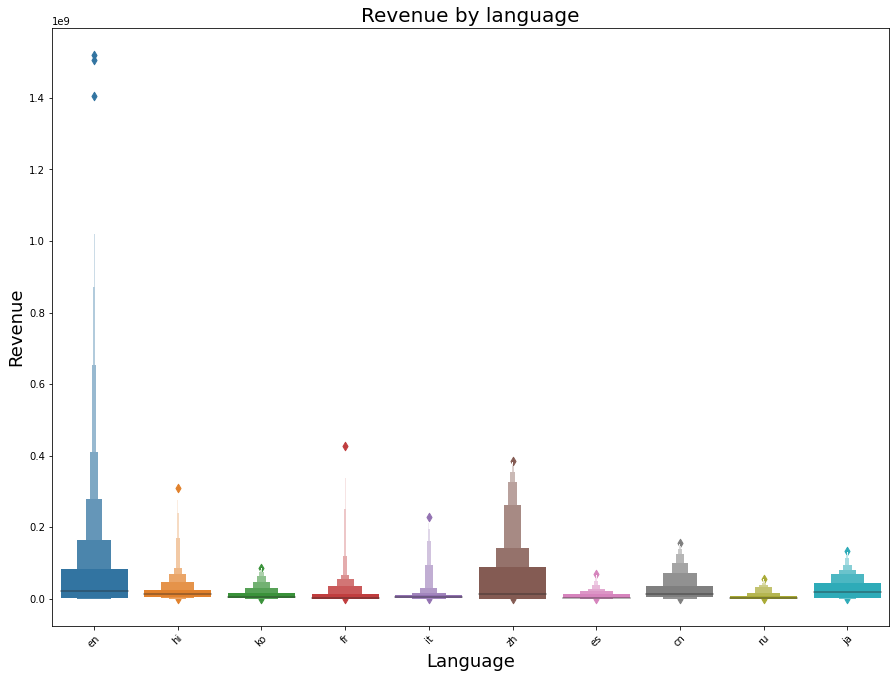

In [36]:
#How language contributes to revenue
plt.figure(figsize=(15,11)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='original_language', y='revenue', 
                   data=train[(train['original_language'].isin((train['original_language'].sort_values().value_counts()[:10].index.values)))])
g1.set_title("Revenue by language", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel

plt.show()

#### Most Common Languages

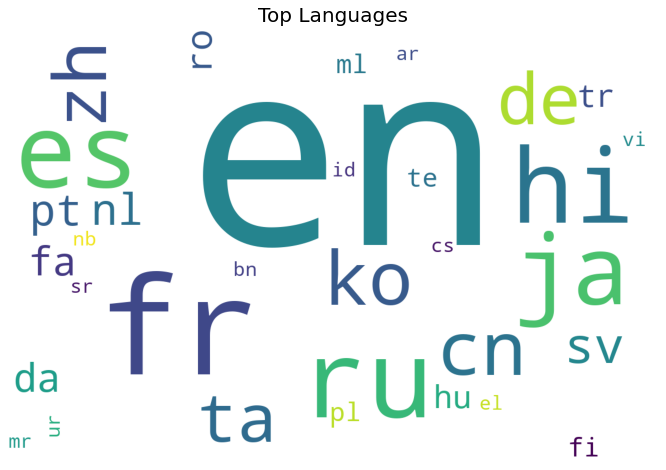

In [37]:
plt.figure(figsize = (12, 8))
text = ' '.join(train['original_language'])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Languages', fontsize=20)
plt.axis("off")
plt.show()

The most common languages in the movie data seem to be English ('en'), French ('fr'), Russian ('ru'), Hindi ('hi') etc

In [38]:
#Taking only en and zh into consideration as they are the highest grossing
train['original_language'] = train['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))
test['original_language'] = test['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))

### Genre

Visualize the relationship between the genre and revenue of the movie


In [39]:
genres = []
repeated_revenues = []
for i in range(len(train)):
  if train['genres'][i] == train['genres'][i]:
      movie_genre = [genre['name'] for genre in eval(train['genres'][i])]
      genres.extend(movie_genre)
      repeated_revenues.extend([train['revenue'][i]]*len(movie_genre))
  
genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

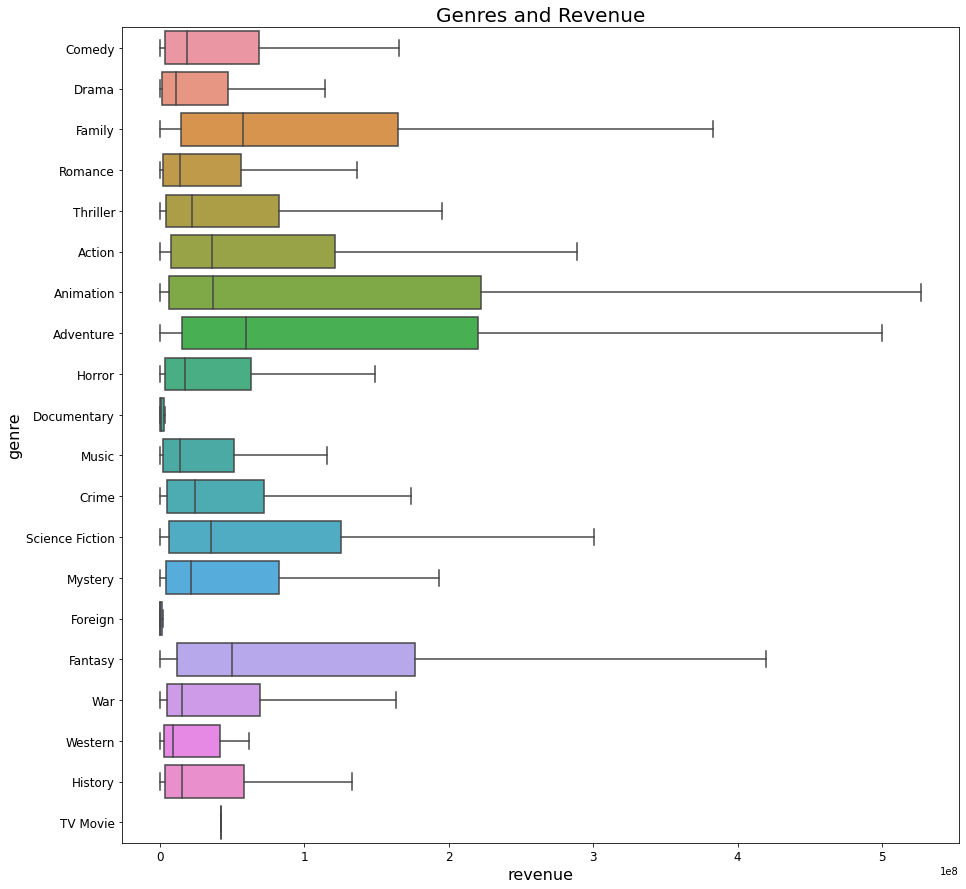

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h')
plt.show()

It looks like some movie genres tend to earn more revenue than others on average. Animation and Adventure movies lead the way in terms of revenue, but Family and Fantasy are not far behind.

In [41]:
#adding number of genres for each movie
genres_count=[]
for i in train['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
train['num_genres'] = genres_count

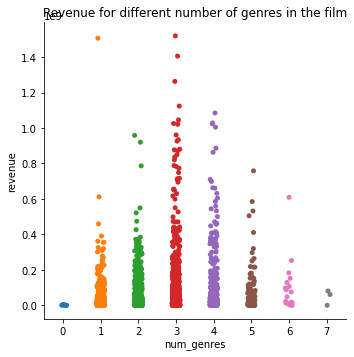

In [42]:
#Genres v/s revenue
sns.catplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');

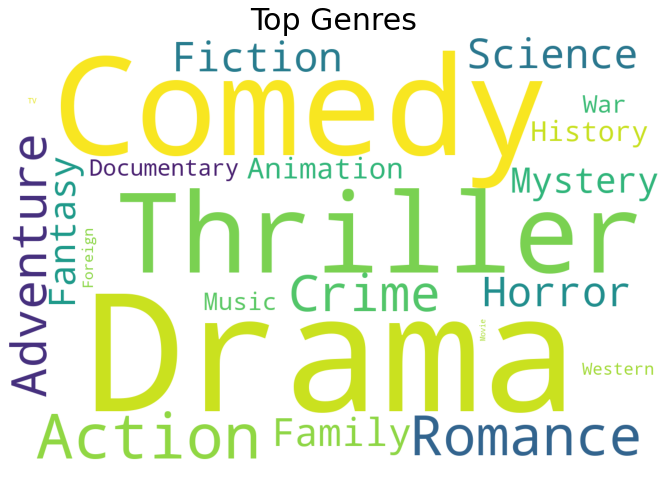

In [43]:
plt.figure(figsize = (12, 8))
text = ' '.join(genres)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=30)
plt.axis("off")
plt.show()

The most common movie genres seem to be Drama, Comedy, Thriller, Action and Adventure.

In [44]:
#Adding genres count for test data
genres_count_test=[]
for i in test['genres']:
    if(not(pd.isnull(i))):
        
        genres_count_test.append(len(eval(i)))
        
    else:
        genres_count_test.append(0)
test['num_genres'] = genres_count_test

In [45]:
#Dropping genres
train.drop(['genres'],axis=1, inplace = True)
test.drop(['genres'],axis=1, inplace = True)

#### Production Company

In [46]:
#Adding production_companies count for data
prod_comp_count=[]
for i in train['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count.append(len(eval(i)))
        
    else:
        prod_comp_count.append(0)
train['num_prod_companies'] = prod_comp_count

Text(0.5, 1.0, 'Revenue for different number of production companies in the film')

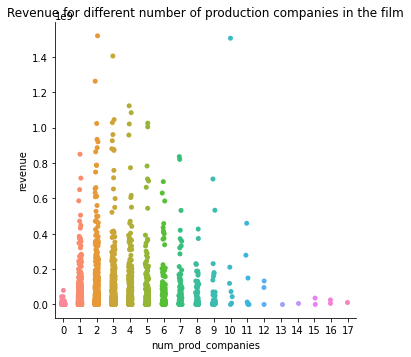

In [47]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=train)
plt.title('Revenue for different number of production companies in the film')


In [48]:
#Adding production_companies count for  test data
prod_comp_count_test=[]
for i in test['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count_test.append(len(eval(i)))
        
    else:
        prod_comp_count_test.append(0)
test['num_prod_companies'] = prod_comp_count_test

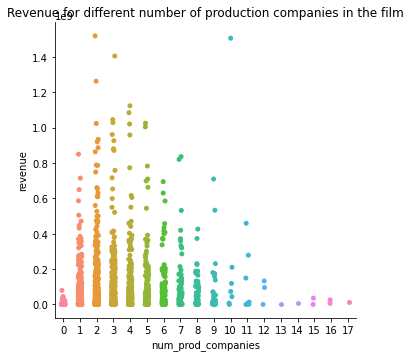

In [49]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=train);
plt.title('Revenue for different number of production companies in the film');

In [50]:
#Dropping production_companies
train.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)

#### Production Countries

In [51]:
#Adding production_countries count for  data
prod_coun_count=[]
for i in train['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count.append(len(eval(i)))
        
    else:
        prod_coun_count.append(0)
train['num_prod_countries'] = prod_coun_count

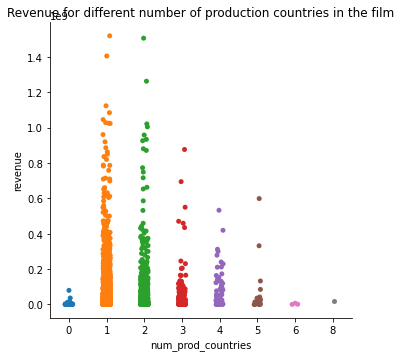

In [52]:
#number of prod countries vs revenue
sns.catplot(x='num_prod_countries', y='revenue', data=train);
plt.title('Revenue for different number of production countries in the film');

In [53]:
#Adding production_countries count for  test data
prod_coun_count_test=[]
for i in test['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count_test.append(len(eval(i)))
        
    else:
        prod_coun_count_test.append(0)
test['num_prod_countries'] = prod_coun_count_test

In [54]:
#Dropping production_countries
train.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

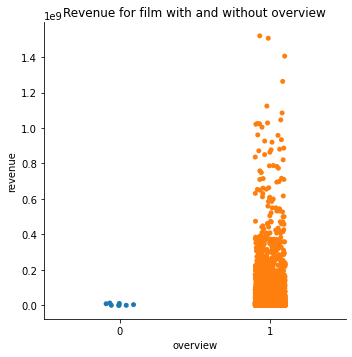

In [55]:
#handling overview
#mapping overview present to 1 and nulls to 0
train['overview']=train['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['overview']=test['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
sns.catplot(x='overview', y='revenue', data=train);
plt.title('Revenue for film with and without overview');

In [56]:
train = train.drop(['overview'],axis=1)
test = test.drop(['overview'],axis=1)

#### Movie Cast

In [57]:
#cast
#Adding cast count for  data
total_cast=[]
for i in train['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
train['cast_count'] = total_cast

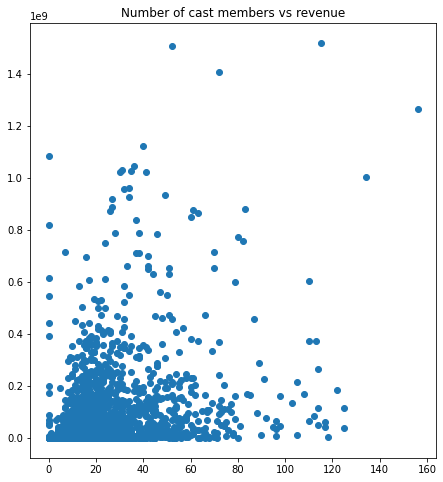

In [58]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['cast_count'], train['revenue'])
plt.title('Number of cast members vs revenue');

In [59]:
#cast
#Adding cast count for  test data
total_cast=[]
for i in test['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
test['cast_count'] = total_cast

In [60]:
#Dropping cast
train = train.drop(['cast'],axis=1)
test = test.drop(['cast'],axis=1)

#### Crew

In [61]:
#crew
total_crew=[]
for i in train['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
train['crew_count'] = total_crew

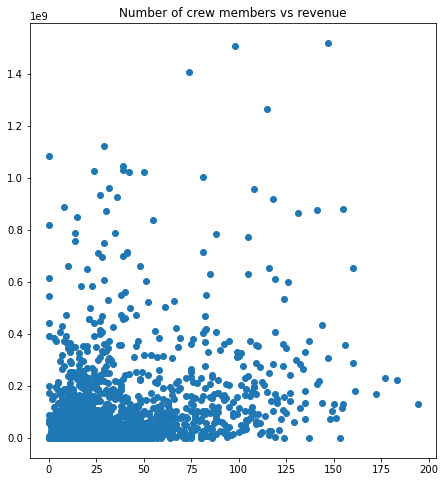

In [62]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['crew_count'], train['revenue'])
plt.title('Number of crew members vs revenue');

In [63]:
#Adding crew count for  test data
total_crew=[]
for i in test['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
test['crew_count'] = total_crew

In [64]:
#Dropping crew
train = train.drop(['crew'],axis=1)
test = test.drop(['crew'],axis=1)

In [65]:
#Dropping original_title
train = train.drop(['original_title'],axis=1)
test = test.drop(['original_title'],axis=1)

### Check correlation between variables

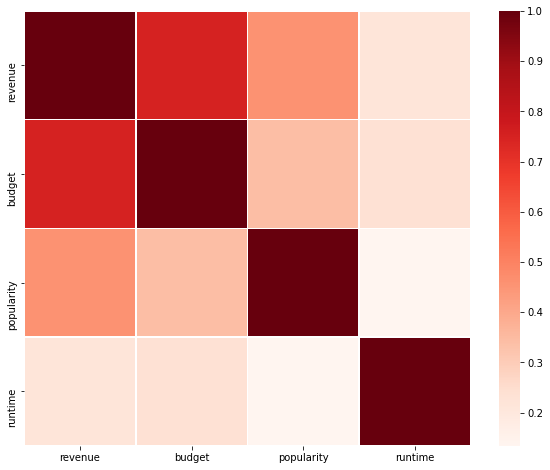

In [66]:
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = train[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

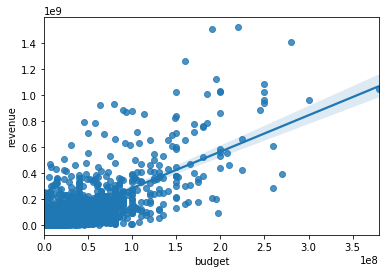

In [67]:
#budget and revenue are highly correlated
sns.regplot(x="budget", y="revenue", data = train)

#### Release Date

In [68]:
#Check how revenue depends of day
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

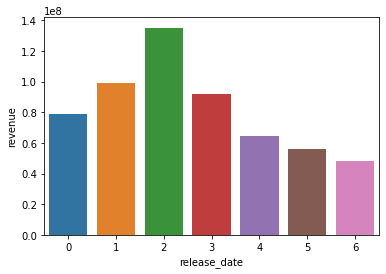

In [69]:
release_day = train['release_date'].value_counts().sort_index()
release_day_revenue = train.groupby(['release_date'])['revenue'].sum()
release_day_revenue.index = release_day_revenue.index.dayofweek
sns.barplot(release_day_revenue.index,release_day_revenue, data = train,ci=None)
plt.show()

In [70]:
#adding day feature to the data

train['release_day'] = train['release_date'].dt.dayofweek 
test['release_day'] = test['release_date'].dt.dayofweek 

In [71]:
#filling nulls in test
test['release_day'] = test['release_day'].fillna(0)

In [72]:
train.drop(['release_date'],axis=1,inplace=True)
test.drop(['release_date'],axis=1,inplace=True)

In [73]:
#status
print("train data")
print(train['status'].value_counts())
print("test data")
test['status'].value_counts()

train data
Released    2996
Rumored        4
Name: status, dtype: int64
test data


Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [74]:
#Feature is irrelevant hence dropping
train.drop(['status'],axis=1,inplace =True)
test.drop(['status'],axis=1,inplace =True)

In [75]:
#keywords
Keywords_count=[]
for i in train['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_count.append(len(eval(i)))
        
    else:
        Keywords_count.append(0)
train['Keywords_count'] = Keywords_count

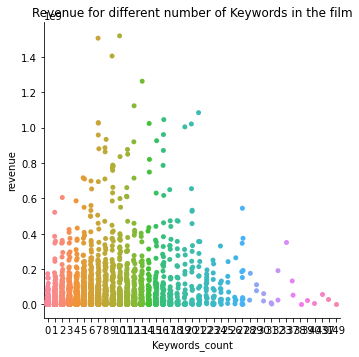

In [76]:
#number of prod countries vs revenue
sns.catplot(x='Keywords_count', y='revenue', data=train);
plt.title('Revenue for different number of Keywords in the film');

In [77]:
Keywords_count=[]
for i in test['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_count.append(len(eval(i)))
        
    else:
        Keywords_count.append(0)
test['Keywords_count'] = Keywords_count

In [78]:
#Dropping title and keywords
train = train.drop(['Keywords'],axis=1)
train = train.drop(['title'],axis=1)
test = test.drop(['Keywords'],axis=1)
test = test.drop(['title'],axis=1)

#### Tagline 

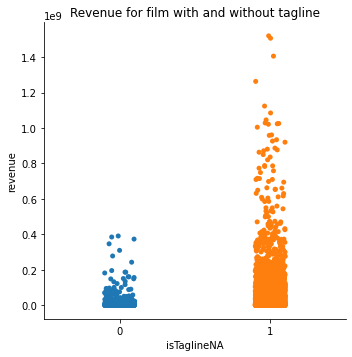

In [79]:

train['isTaglineNA'] = 0
train.loc[train['tagline'].isnull() == False, 'isTaglineNA'] = 1
test['isTaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'isTaglineNA'] = 1

#Homepage v/s Revenue
sns.catplot(x='isTaglineNA', y='revenue', data = train);
plt.title('Revenue for film with and without tagline');

In [80]:
train.drop(['tagline'],axis=1,inplace =True)
test.drop(['tagline'],axis=1,inplace =True)

In [81]:
#runtime has 2 nulls; setting it to the mean
#filling nulls in test
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(test['runtime'].mean())

#### Spoken languages

In [82]:
#adding number of spoken languages for each movie
spoken_count=[]
for i in train['spoken_languages']:
    if(not(pd.isnull(i))):
        
        spoken_count.append(len(eval(i)))
        
    else:
        spoken_count.append(0)
train['spoken_count'] = spoken_count


spoken_count_test=[]
for i in test['spoken_languages']:
    if(not(pd.isnull(i))):
        
        spoken_count_test.append(len(eval(i)))
        
    else:
        spoken_count_test.append(0)
test['spoken_count'] = spoken_count_test

In [83]:
#dropping spoken_languages
train.drop(['spoken_languages'],axis=1,inplace=True)
test.drop(['spoken_languages'],axis=1,inplace=True)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3000 non-null   int64  
 1   budget              3000 non-null   int64  
 2   original_language   3000 non-null   int64  
 3   popularity          3000 non-null   float64
 4   runtime             3000 non-null   float64
 5   revenue             3000 non-null   int64  
 6   has_homepage        3000 non-null   int64  
 7   collection          3000 non-null   int64  
 8   num_genres          3000 non-null   int64  
 9   num_prod_companies  3000 non-null   int64  
 10  num_prod_countries  3000 non-null   int64  
 11  cast_count          3000 non-null   int64  
 12  crew_count          3000 non-null   int64  
 13  release_day         3000 non-null   int64  
 14  Keywords_count      3000 non-null   int64  
 15  isTaglineNA         3000 non-null   int64  
 16  spoken

Let's check dataset

In [85]:
train.head()

,id,budget,original_language,popularity,runtime,revenue,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
0,1,14000000,1,6.575393,93.0,12314651,0,1,1,3,1,24,72,4,4,1,1
1,2,40000000,1,8.248895,113.0,95149435,0,1,4,1,1,20,9,4,4,1,1
2,3,3300000,1,64.299990,105.0,13092000,1,0,1,3,1,51,64,4,12,1,1
3,4,1200000,0,3.174936,122.0,16000000,1,0,2,0,1,7,3,4,7,0,2
4,5,0,0,1.148070,118.0,3923970,0,0,2,0,1,4,2,3,0,0,1


In [86]:
test.head()

,id,budget,original_language,popularity,runtime,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
0,3001,0,0,3.851534,90.0,1,1,4,0,2,7,2,5.0,2,1,2
1,3002,88000,1,3.559789,65.0,0,0,2,1,1,10,8,6.0,8,1,1
2,3003,0,1,8.085194,100.0,0,0,2,3,1,9,10,4.0,4,1,1
3,3004,6800000,0,8.596012,130.0,1,0,3,3,2,23,69,5.0,15,1,3
4,3005,2000000,1,3.217680,92.0,0,0,2,0,1,4,14,4.0,4,1,1


In [87]:
print(train.shape)
print(test.shape)

(3000, 17)
(4398, 16)


In [88]:
train['budget'] = np.log1p(train['budget'])
test['budget'] = np.log1p(test['budget'])

### Prepare dataset for train the Model

In [89]:
y= train['revenue'].values
cols = [col for col in train.columns if col not in ['revenue', 'id']]
X= train[cols].values
y = np.log1p(y)

### Traning the model

1. Linear Regression
2. Random Forest Regression

### Model1: Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
scores = cross_val_score(clf, X, y, scoring="neg_mean_squared_error", cv = 8)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.4236034243650315


### Model2: Random Forest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, min_samples_split=5, random_state = 10,
                             n_estimators=500)
scores = cross_val_score(regr, X, y, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.21274632296787


### # Testing the model

In [92]:
cols = [col for col in test.columns if col not in ['id']]
X_test= test[cols].values

In [93]:
regr.fit(X,y)
y_pred = regr.predict(X_test)

In [94]:
y_pred=np.expm1(y_pred)
pd.DataFrame({'id': test.id, 'revenue': y_pred}).to_csv('submission_RF.csv', index=False)

![](https://i.pinimg.com/originals/42/44/d8/4244d86f56e6b8d25c8bd67732165021.gif)

I hope this kernal is useful to you.

If find this notebook help you to learn, **Please Upvote**.

![](https://media.tenor.com/images/ba3ec917b6414b01fa85d33979336864/tenor.gif)